In [26]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from scipy import stats

In [72]:
data = pd.read_csv("data.csv")

data = data.rename(columns={"Позначка часу": "time", "Ім'я користувача": "email", "Ваша стать?": "sex", "Ваш вік?":"age", "Чи є ви дійсним громадянином / громадянкою України?":"is_citizen", "З якого ви регіону України? (дуже умовний поділ, можете обрати два варіанти)":"region", "Чи проживаєте ви зараз на території України?":"where_live", "Наскільки часто ви використовували російську мову в повсякденному житті ДО початку повномасштабного вторгнення?":"lang_before", "Наскільки часто ви використовуєте російську мову в повсякденному житті зараз?":"lang_after", "Переглядаючи зарубіжний контент онлайн (фільми, серіали і тд), озвучку якою мовою ви використовували в більшості випадків ДО початку повномасштабного вторгнення? (можна обирати кілька варіантів)":"movies_before", "Переглядаючи зарубіжний контент онлайн (фільми, серіали і тд), озвучку якою мовою ви використовуєте зараз? (можна обирати кілька варіантів)":"movies_after", "Наскільки часто ви споживали контент російських авторів ДО початку повномасштабного вторшнення? (музика, фільми, ютуб канали, сторінки в соціальних мережах і тд)":"content_before", "Наскільки часто ви споживаєте контент російських авторів зараз? (музика, фільми, ютуб канали, сторінки в соціальних мережах і тд)":"content_after", "Маєте коментарі щодо опитування? Лишайте їх тут!":"comments"})
data["sex"] = data["sex"].replace(['Чоловіча'], 'Male')
data["sex"] = data["sex"].replace(['Жіноча'], 'Female')
data["sex"] = data["sex"].replace(["Чоловік з тілом жінки"], 'NB')
data["sex"] = data["sex"].replace(['Небінарна'], 'NB')
data["is_citizen"] = data["is_citizen"].replace(['Так'], 'yes')
data = data[data["is_citizen"] == "yes"]

for _ in range (len(data)):
    data["region"].iloc[_] = data["region"].iloc[_].split(";")
    if data["region"].iloc[_] is not list:
        data["region"].iloc[_] = list(data["region"].iloc[_])
    for i in range(len(data["region"].iloc[_])):
        if data["region"].iloc[_][i] == "Центральна/Північна Україна":
            data["region"].iloc[_][i] = "Сentral-north"
        elif data["region"].iloc[_][i] == "Західна Україна":
            data["region"].iloc[_][i] = "West"
        elif data["region"].iloc[_][i] == "Східна Україна":
            data["region"].iloc[_][i] = "East"
        elif data["region"].iloc[_][i] == "Південна Україна":
            data["region"].iloc[_][i] = "South"
    
    data["movies_before"].iloc[_] = data["movies_before"].iloc[_].split(";")
    if data["movies_before"].iloc[_] is not list:
        data["movies_before"].iloc[_] = list(data["movies_before"].iloc[_])
    for i in range(len(data["movies_before"].iloc[_])):
        if data["movies_before"].iloc[_][i] == "Українською":
            data["movies_before"].iloc[_][i] = "Ukrainian"
        elif data["movies_before"].iloc[_][i] == "Англійською":
            data["movies_before"].iloc[_][i] = "English"
        elif data["movies_before"].iloc[_][i] == "Російською":
            data["movies_before"].iloc[_][i] = "russian"
        else: data["movies_before"].iloc[_][i] = "other"
            
    data["movies_after"].iloc[_] = data["movies_after"].iloc[_].split(";")
    if data["movies_after"].iloc[_] is not list:
        data["movies_after"].iloc[_] = list(data["movies_after"].iloc[_])
    for i in range(len(data["movies_after"].iloc[_])):
        if data["movies_after"].iloc[_][i] == "Українською":
            data["movies_after"].iloc[_][i] = "Ukrainian"
        elif data["movies_after"].iloc[_][i] == "Англійською":
            data["movies_after"].iloc[_][i] = "English"
        elif data["movies_after"].iloc[_][i] == "Російською":
            data["movies_after"].iloc[_][i] = "russian"
        else: data["movies_after"].iloc[_][i] = "other"

data["where_live"] = data["where_live"].replace(['Ні, тимчасово закордоном'], 'temp_abroad')
data["where_live"] = data["where_live"].replace(['Ні, навряд чи повернусь жити в Україну'], 'perm_abroad')
data["where_live"] = data["where_live"].replace(['Так'], 'in_Ukraine')

data["lang_before"] = data["lang_before"].replace(['Ніколи'], 1)
data["lang_before"] = data["lang_before"].replace(['Дуже рідко'], 2)
data["lang_before"] = data["lang_before"].replace(['Доволі часто'], 3)
data["lang_before"] = data["lang_before"].replace(['У більшості випадків'], 4)
data["lang_before"] = data["lang_before"].replace(['Завжди'], 5)

data["lang_after"] = data["lang_after"].replace(['Ніколи'], 1)
data["lang_after"] = data["lang_after"].replace(['Дуже рідко'], 2)
data["lang_after"] = data["lang_after"].replace(['Доволі часто'], 3)
data["lang_after"] = data["lang_after"].replace(['У більшості випадків'], 4)
data["lang_after"] = data["lang_after"].replace(['Завжди'], 5)

data["content_before"] = data["content_before"].replace(['Ніколи'], 1)
data["content_before"] = data["content_before"].replace(['Дуже рідко'], 2)
data["content_before"] = data["content_before"].replace(['Доволі часто'], 3)
data["content_before"] = data["content_before"].replace(['У більшості випадків'], 4)
data["content_before"] = data["content_before"].replace(['Завжди'], 5)

data["content_after"] = data["content_after"].replace(['Ніколи'], 1)
data["content_after"] = data["content_after"].replace(['Дуже рідко'], 2)
data["content_after"] = data["content_after"].replace(['Доволі часто'], 3)
data["content_after"] = data["content_after"].replace(['У більшості випадків'], 4)
data["content_after"] = data["content_after"].replace(['Завжди'], 5)

data = data.explode("region")

data

/var/folders/82/tn_y_f9x3rs2lrb50p90sz580000gn/T/ipykernel_1355/1289148807.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["region"].iloc[_] = list(data["region"].iloc[_])
/var/folders/82/tn_y_f9x3rs2lrb50p90sz580000gn/T/ipykernel_1355/1289148807.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["movies_before"].iloc[_] = list(data["movies_before"].iloc[_])
/var/folders/82/tn_y_f9x3rs2lrb50p90sz580000gn/T/ipykernel_1355/1289148807.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,time,email,sex,age,is_citizen,region,where_live,lang_before,lang_after,movies_before,movies_after,content_before,content_after,comments
0,2023/01/30 6:23:56 дп GMT+1,bohdan.kontsur@gmail.com,Male,18,yes,Сentral-north,temp_abroad,1,1,"[Ukrainian, English]","[Ukrainian, English, other]",2,2,Мені здається білоруських виконавців таки можн...
0,2023/01/30 6:23:56 дп GMT+1,bohdan.kontsur@gmail.com,Male,18,yes,West,temp_abroad,1,1,"[Ukrainian, English]","[Ukrainian, English, other]",2,2,Мені здається білоруських виконавців таки можн...
1,2023/01/30 10:38:28 дп GMT+1,krasnayastal@gmail.com,Male,18,yes,Сentral-north,temp_abroad,2,2,"[Ukrainian, English]","[Ukrainian, English]",3,2,"Найкраще опитування, автор молодець, 10/10"
2,2023/01/30 12:49:50 пп GMT+1,mykhailo.trushch@gmail.com,Male,18,yes,East,temp_abroad,4,4,"[Ukrainian, English]","[Ukrainian, English]",3,2,NaN
3,2023/01/30 12:53:18 пп GMT+1,polinaoverchenko@gmail.com,Female,19,yes,Сentral-north,temp_abroad,3,2,[English],[English],3,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2023/02/08 7:12:14 пп GMT+1,eoneoff.yandex@gmail.com,Male,44,yes,Сentral-north,in_Ukraine,3,2,"[Ukrainian, English, russian]","[Ukrainian, English, russian]",2,2,NaN
230,2023/02/08 7:22:52 пп GMT+1,jkaooaoa@gmail.com,Female,17,yes,West,in_Ukraine,1,1,"[Ukrainian, English]","[Ukrainian, English]",1,1,NaN
231,2023/02/08 8:02:19 пп GMT+1,puteriko13@gmail.com,Male,32,yes,West,in_Ukraine,1,1,[Ukrainian],[Ukrainian],3,1,NaN
232,2023/02/08 8:03:33 пп GMT+1,anastasiya.serediuk@gmail.com,Female,18,yes,West,in_Ukraine,2,1,"[Ukrainian, English, russian]",[English],3,1,-


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 233
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   time            252 non-null    object
 1   email           252 non-null    object
 2   sex             252 non-null    object
 3   age             252 non-null    int64 
 4   is_citizen      252 non-null    object
 5   region          252 non-null    object
 6   where_live      252 non-null    object
 7   lang_before     252 non-null    int64 
 8   lang_after      252 non-null    int64 
 9   movies_before   252 non-null    object
 10  movies_after    252 non-null    object
 11  content_before  252 non-null    int64 
 12  content_after   252 non-null    int64 
 13  comments        40 non-null     object
dtypes: int64(5), object(9)
memory usage: 29.5+ KB


In [90]:
data = data.drop(columns=["email", "comments"])
data.to_csv("final_dataset.csv")

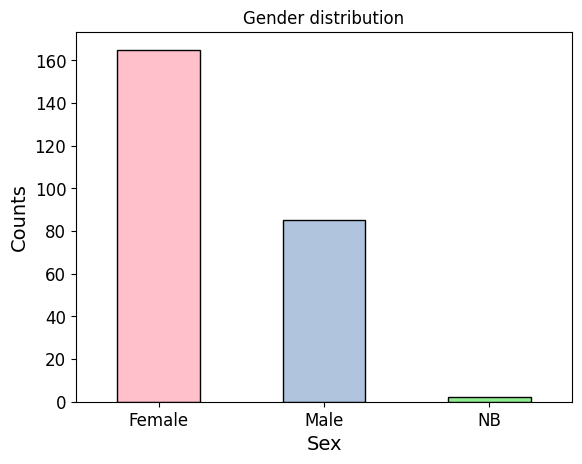

In [75]:
# general description of the dataset

# count the number of occurrences of each unique value in the "sex" column
counts = data['sex'].value_counts()

# create a bar plot with different colors for the two bars
counts.plot(kind='bar', color=['pink', 'lightsteelblue', "lightgreen"], edgecolor='black',)

# add labels and title to the plot
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Gender distribution')

# increase the font size of the tick labels
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

# show and save the plot
plt.savefig("gender_plot.png", transparent=True)
plt.show()

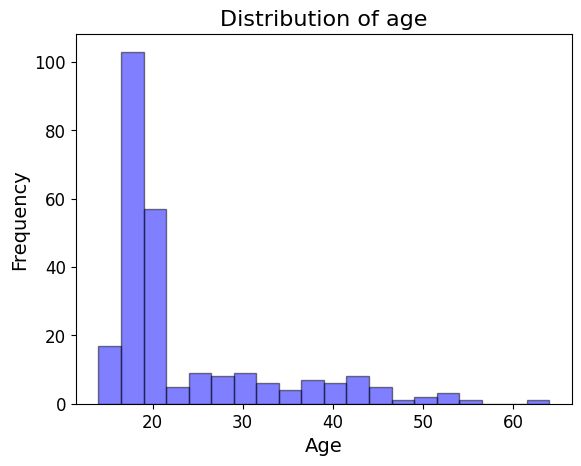

In [76]:
# general description of the dataset

plt.hist(data['age'], bins=20, color='blue', alpha=0.5, edgecolor='black')

# add labels and title to the plot
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of age', fontsize=16)

# increase the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# show and save the plot
plt.savefig("age_plot.png", transparent=True)
plt.show()

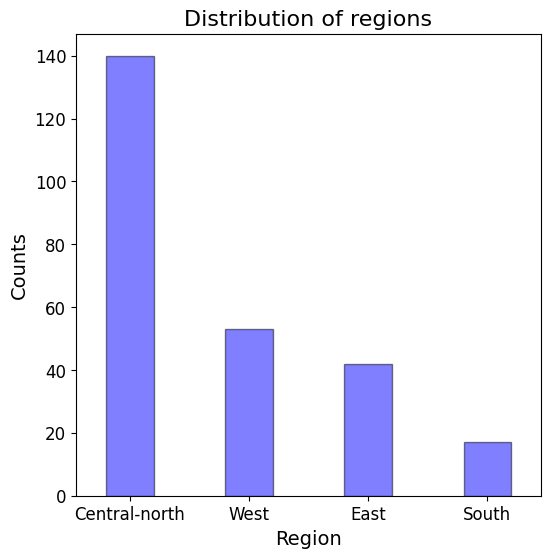

In [77]:
# general description of the dataset

# count the number of occurrences of each unique value in the "region" column
counts = data['region'].value_counts()

# create a figure with a smaller size
fig, ax = plt.subplots(figsize=(6, 6))

# create a bar plot with narrower columns
counts.plot(kind='bar', color='blue', alpha=0.5, edgecolor='black', width=0.4, ax=ax)

# add labels and title to the plot with a larger font size
plt.xlabel('Region', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Distribution of regions', fontsize=16)

# increase the font size of the tick labels
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

# show and save the plot
plt.savefig("regions_plot.png", transparent=True)
plt.show()


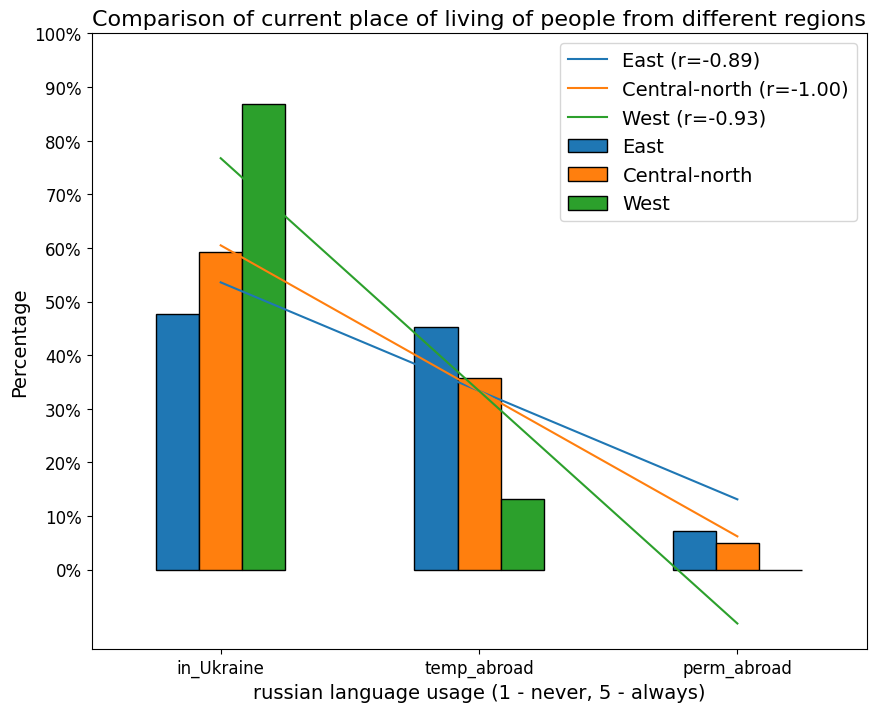

In [89]:
# This plot represents places of living of people from different regions

# create a new dataframe with the count of each unique value in each column
df_east = data[data["region"] == "East"]
df_center = data[data["region"] == "Сentral-north"]
df_west = data[data["region"] == "West"]

compare_df = pd.DataFrame({'East': df_east['where_live'].value_counts(),
                           'Сentral-north': df_center['where_live'].value_counts(),
                           'West': df_west['where_live'].value_counts()})
compare_df.fillna(value=0, inplace=True)
compare_df["East"] = compare_df["East"] / len(df_east)
compare_df["Сentral-north"] = compare_df["Сentral-north"] / len(df_center)
compare_df["West"] = compare_df["West"] / len(df_west)
compare_df = compare_df.reindex(index=["in_Ukraine", "temp_abroad", "perm_abroad"])

# create a bar plot comparison of the two columns
compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

# add linear regressions for each column
x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

# add labels and title to the plot
plt.xlabel('russian language usage (1 - never, 5 - always)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison of current place of living of people from different regions', fontsize=16)

# increase the font size of the tick labels
plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=12)
plt.legend(fontsize=14)

# show and save the plot
plt.savefig("regions_place_of_living.png", transparent=True)
plt.show()

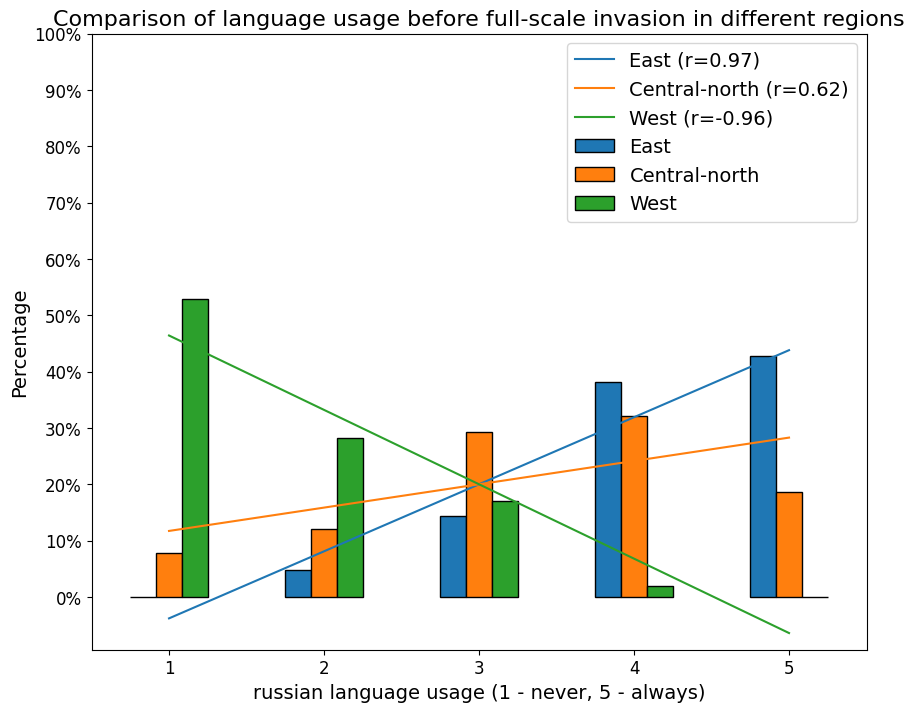

In [79]:
# This plot represents usage of russian language in general in different regions BEFORE the full-scale invasion


# create a new dataframe with the count of each unique value in each column
df_east = data[data["region"] == "East"]
df_center = data[data["region"] == "Сentral-north"]
df_west = data[data["region"] == "West"]

compare_df = pd.DataFrame({'East': df_east['lang_before'].value_counts(),
                           'Сentral-north': df_center['lang_before'].value_counts(),
                           'West': df_west['lang_before'].value_counts()})
compare_df.fillna(value=0, inplace=True)
compare_df["East"] = compare_df["East"] / len(df_east)
compare_df["Сentral-north"] = compare_df["Сentral-north"] / len(df_center)
compare_df["West"] = compare_df["West"] / len(df_west)

# create a bar plot comparison of the two columns
compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

# add linear regressions for each column
x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, pd_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

# add labels and title to the plot
plt.xlabel('russian language usage (1 - never, 5 - always)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison of language usage before full-scale invasion in different regions', fontsize=16)

# increase the font size of the tick labels
plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=12)
plt.legend(fontsize=14)

# show and save the plot
plt.savefig("regions_language_before.png", transparent=True)
plt.show()


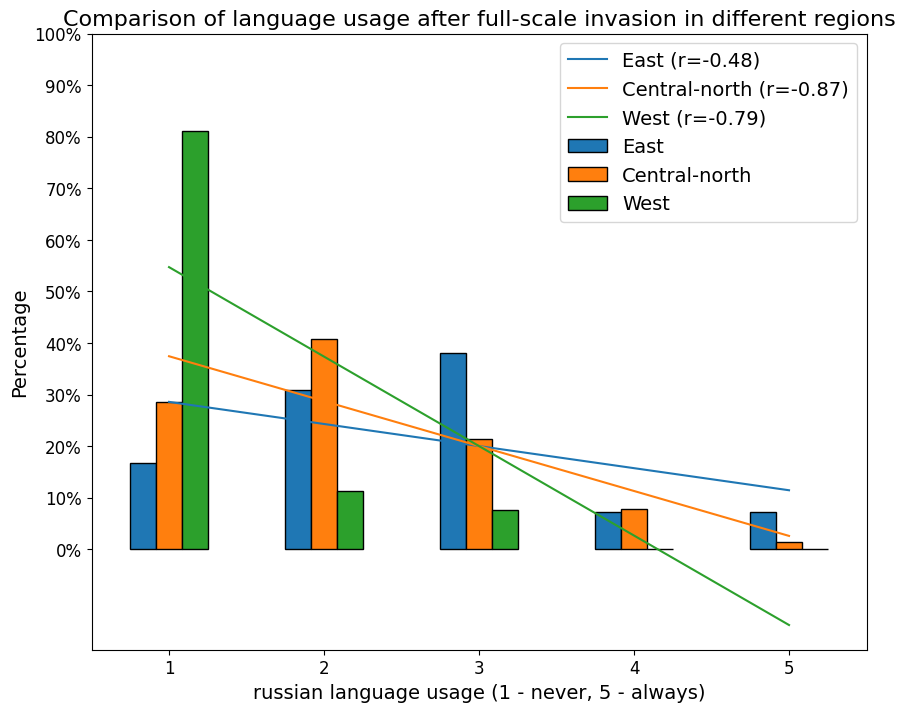

In [80]:
# This plot represents usage of russian language in general in different regions AFTER the full-scale invasion 


# create a new dataframe with the count of each unique value in each column
df_east = data[data["region"] == "East"]
df_center = data[data["region"] == "Сentral-north"]
df_west = data[data["region"] == "West"]

compare_df = pd.DataFrame({'East': df_east['lang_after'].value_counts(),
                           'Сentral-north': df_center['lang_after'].value_counts(),
                           'West': df_west['lang_after'].value_counts()})
compare_df.fillna(value=0, inplace=True)
compare_df["East"] = compare_df["East"] / len(df_east)
compare_df["Сentral-north"] = compare_df["Сentral-north"] / len(df_center)
compare_df["West"] = compare_df["West"] / len(df_west)

# create a bar plot comparison of the two columns
compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

# add linear regressions for each column
x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

# add labels and title to the plot
plt.xlabel('russian language usage (1 - never, 5 - always)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison of language usage after full-scale invasion in different regions', fontsize=16)

# increase the font size of the tick labels
plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=12)
plt.legend(fontsize=14)

# show and save the plot
plt.savefig("regions_language_after.png", transparent=True)
plt.show()

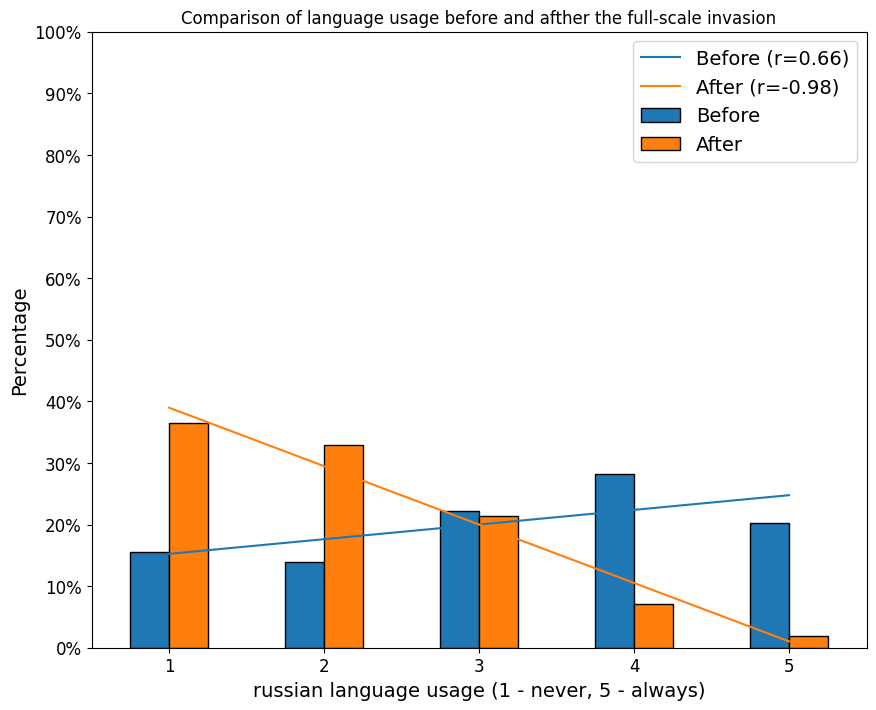

In [81]:
# create a new dataframe with the count of each unique value in each column
compare_df = pd.DataFrame({'Before': data['lang_before'].value_counts(),
                           'After': data['lang_after'].value_counts()})
compare_df["Before"] = compare_df["Before"] / len(data['lang_before'])
compare_df["After"] = compare_df["After"] / len(data['lang_after'])

# create a bar plot comparison of the two columns
compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

# add linear regressions for each column
x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

# add labels and title to the plot
plt.xlabel('russian language usage (1 - never, 5 - always)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison of language usage before and afther the full-scale invasion')

# increase the font size of the tick labels
plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=12)
plt.legend(fontsize=14)

# show and save the plot
plt.savefig("language_before_and_after.png", transparent=True)
plt.show()

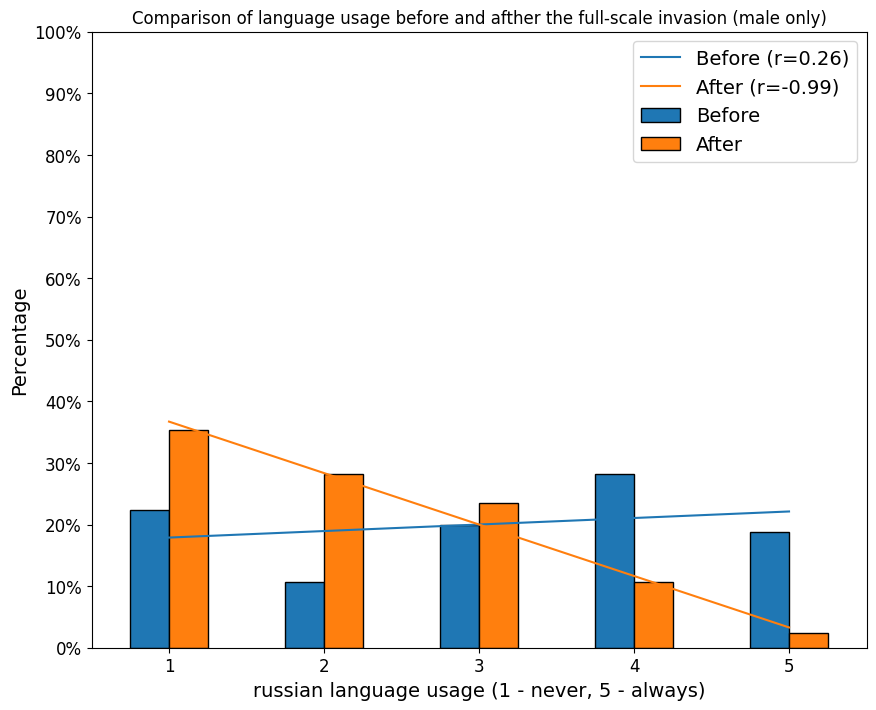

In [82]:
# PLOT FOR MAN
data_male = data[data["sex"] == "Male"]
# create a new dataframe with the count of each unique value in each column
compare_df = pd.DataFrame({'Before': data_male['lang_before'].value_counts(),
                           'After': data_male['lang_after'].value_counts()})
compare_df["Before"] = compare_df["Before"] / len(data_male['lang_before'])
compare_df["After"] = compare_df["After"] / len(data_male['lang_after'])

# create a bar plot comparison of the two columns
compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

# add linear regressions for each column
x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

# add labels and title to the plot
plt.xlabel('russian language usage (1 - never, 5 - always)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison of language usage before and afther the full-scale invasion (male only)')

# increase the font size of the tick labels
plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=12)
plt.legend(fontsize=14)

# show and save the plot
plt.savefig("language_before_and_after_male.png", transparent=True)
plt.show()

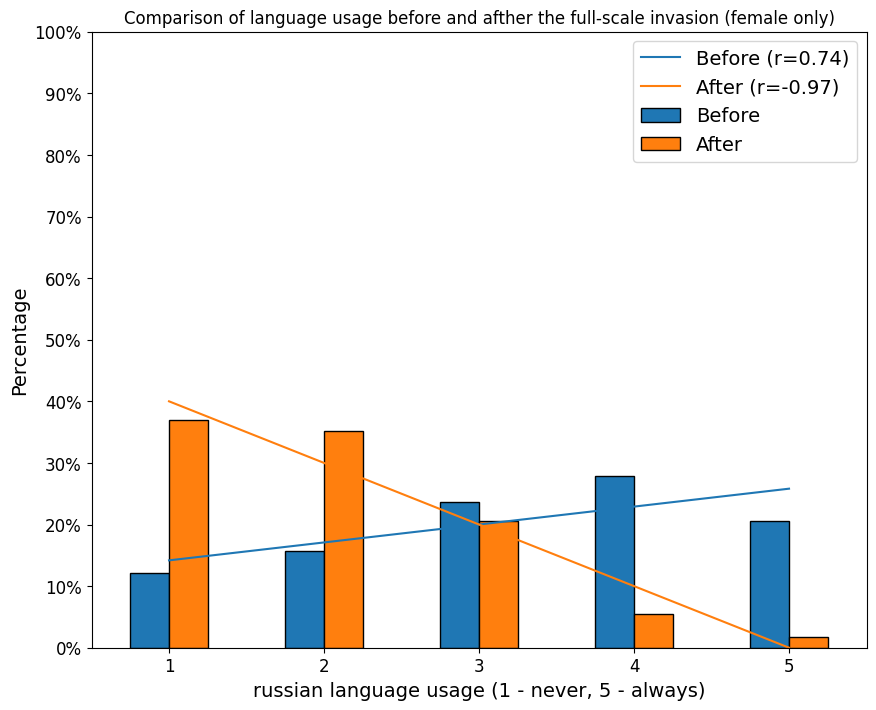

In [83]:
# PLOT FOR WOMAN
data_female = data[data["sex"] == "Female"]


# create a new dataframe with the count of each unique value in each column
compare_df = pd.DataFrame({'Before': data_female['lang_before'].value_counts(),
                           'After': data_female['lang_after'].value_counts()})
compare_df["Before"] = compare_df["Before"] / len(data_female['lang_before'])
compare_df["After"] = compare_df["After"] / len(data_female['lang_after'])

# create a bar plot comparison of the two columns
compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

# add linear regressions for each column
x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

# add labels and title to the plot
plt.xlabel('russian language usage (1 - never, 5 - always)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison of language usage before and afther the full-scale invasion (female only)')

# increase the font size of the tick labels
plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=12)
plt.legend(fontsize=14)

# show and save the plot
plt.savefig("language_before_and_after_female.png", transparent=True)
plt.show()

201


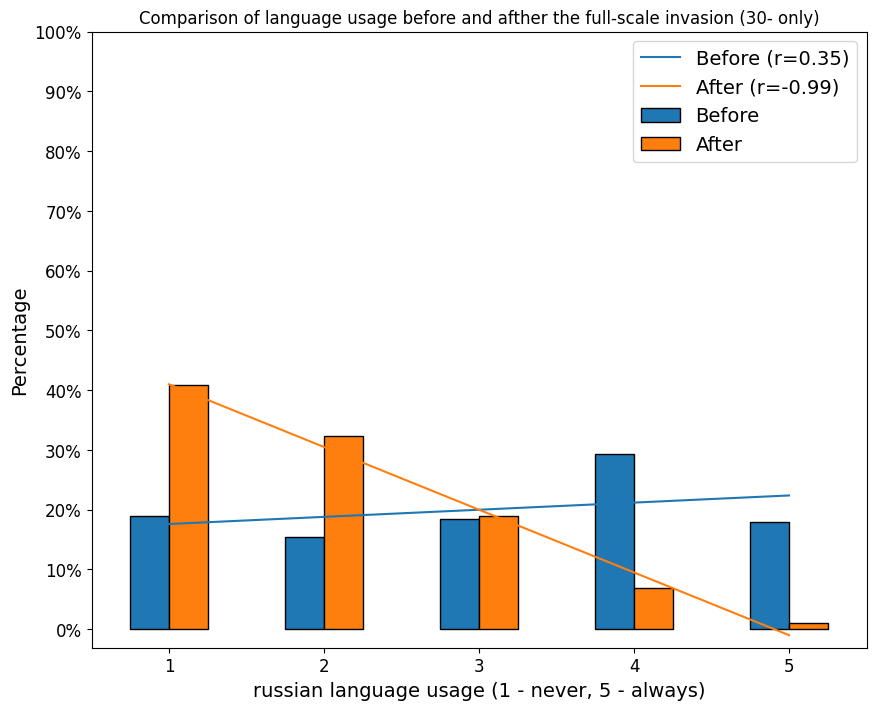

In [84]:
# PLOT FOR less than 30
data_male = data[data["age"] < 30]
print(len(data_male))
# create a new dataframe with the count of each unique value in each column
compare_df = pd.DataFrame({'Before': data_male['lang_before'].value_counts(),
                           'After': data_male['lang_after'].value_counts()})
compare_df["Before"] = compare_df["Before"] / len(data_male['lang_before'])
compare_df["After"] = compare_df["After"] / len(data_male['lang_after'])

# create a bar plot comparison of the two columns
compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

# add linear regressions for each column
x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

# add labels and title to the plot
plt.xlabel('russian language usage (1 - never, 5 - always)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison of language usage before and afther the full-scale invasion (30- only)')

# increase the font size of the tick labels
plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=12)
plt.legend(fontsize=14)

# show and save the plot
plt.savefig("language_before_after_less_than_30.png", transparent=True)
plt.show()

45


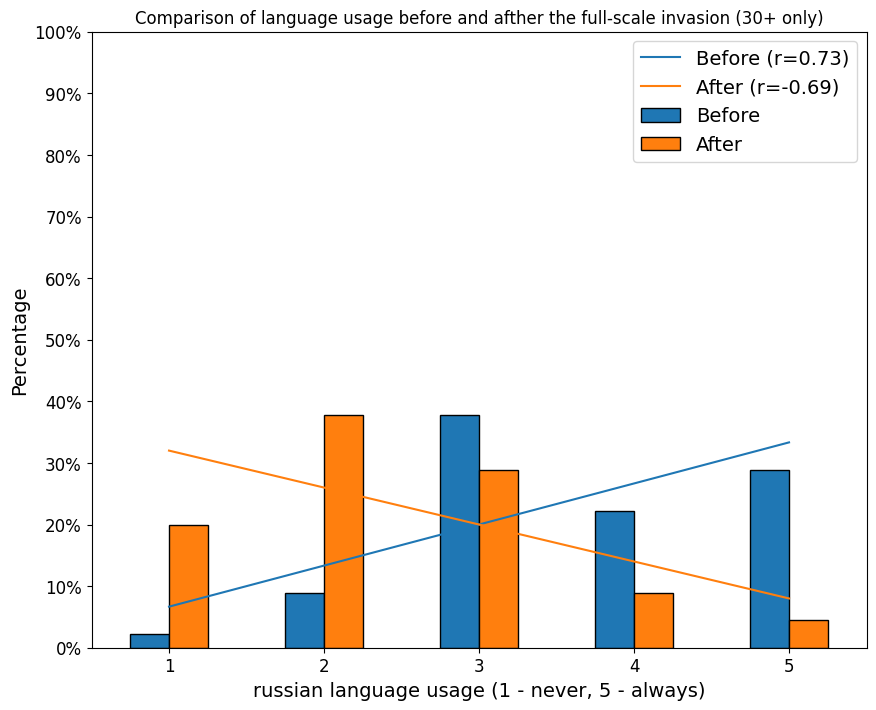

In [85]:
# PLOT FOR more than 30
data_male = data[data["age"] > 30]
print(len(data_male))
# create a new dataframe with the count of each unique value in each column
compare_df = pd.DataFrame({'Before': data_male['lang_before'].value_counts(),
                           'After': data_male['lang_after'].value_counts()})
compare_df["Before"] = compare_df["Before"] / len(data_male['lang_before'])
compare_df["After"] = compare_df["After"] / len(data_male['lang_after'])

# create a bar plot comparison of the two columns
compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

# add linear regressions for each column
x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

# add labels and title to the plot
plt.xlabel('russian language usage (1 - never, 5 - always)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison of language usage before and afther the full-scale invasion (30+ only)')

# increase the font size of the tick labels
plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=12)
plt.legend(fontsize=14)

# show and save the plot
plt.savefig("language_before_more_than_30.png", transparent=True)
plt.show()

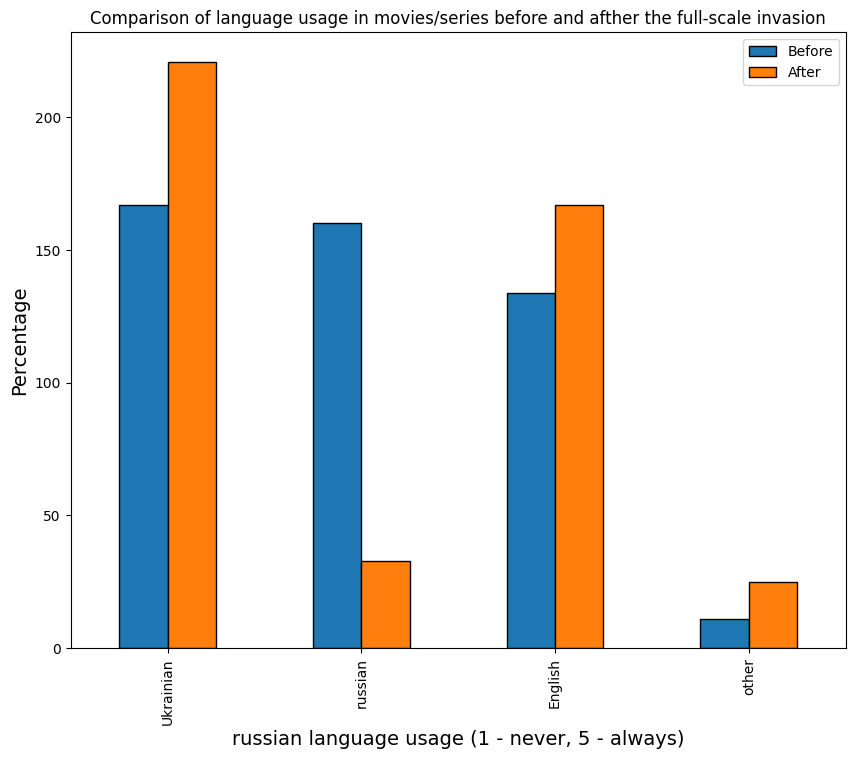

In [86]:
# DIFFERENT LANGUAGES IN MOVIES BEFORE AND AFTER

# create a new dataframe with the count of each unique value in each column
compare_df = pd.DataFrame({'Before': pd.Series(np.concatenate(data["movies_before"].values)).value_counts(),
                           'After': pd.Series(np.concatenate(data["movies_after"].values)).value_counts()})
compare_df = compare_df.reindex(index=["Ukrainian", "russian", "English", "other"])

# create a bar plot comparison of the two columns
compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

# # add linear regressions for each column
# x = np.arange(len(compare_df.index))
# for i, column in enumerate(compare_df.columns):
#     y = compare_df[column].values
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#     plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

# add labels and title to the plot
plt.xlabel('russian language usage (1 - never, 5 - always)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison of language usage in movies/series before and afther the full-scale invasion')

# increase the font size of the tick labels
# plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
# plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=12)
# plt.legend(fontsize=14)

# show and save the plot
plt.savefig("movies_before_and_after.png", transparent=True)
plt.show()

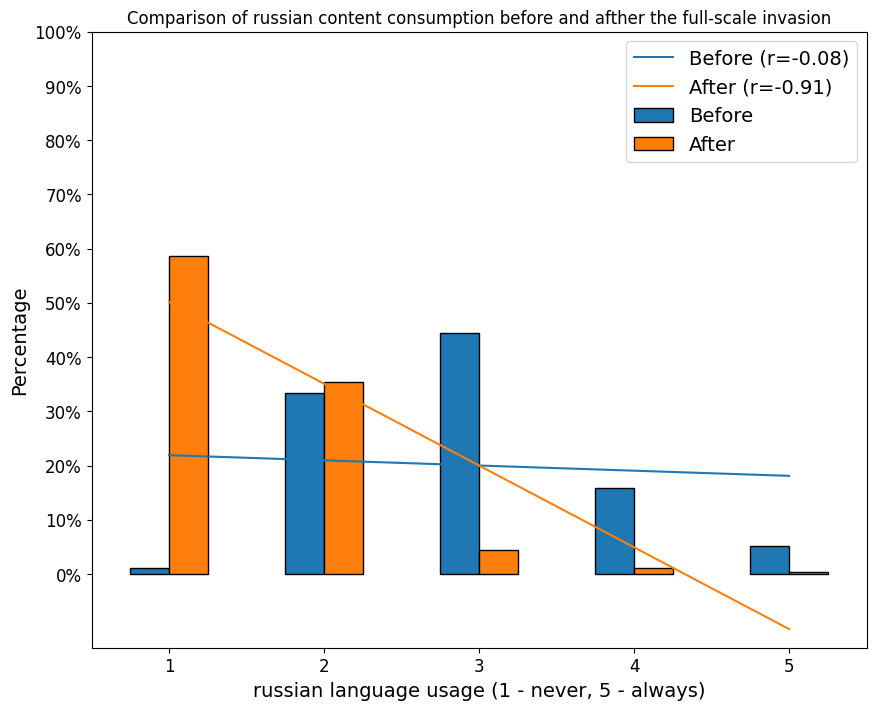

In [87]:
# CONTENT BEFORE AND AFTER


# create a new dataframe with the count of each unique value in each column
compare_df = pd.DataFrame({'Before': data['content_before'].value_counts(),
                           'After': data['content_after'].value_counts()})
compare_df["Before"] = compare_df["Before"] / len(data['lang_before'])
compare_df["After"] = compare_df["After"] / len(data['lang_after'])

# create a bar plot comparison of the two columns
compare_df.plot(kind='bar', figsize=(10, 8), edgecolor='black')

# add linear regressions for each column
x = np.arange(len(compare_df.index))
for i, column in enumerate(compare_df.columns):
    y = compare_df[column].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * x + intercept, color='C{}'.format(i), label='{} (r={:.2f})'.format(column, r_value))

# add labels and title to the plot
plt.xlabel('russian language usage (1 - never, 5 - always)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Comparison of russian content consumption before and afther the full-scale invasion')

# increase the font size of the tick labels
plt.xticks(x, compare_df.index, fontsize=12, rotation=0)
plt.yticks(np.arange(0, 1.1, 0.1), ['{:.0f}%'.format(y * 100) for y in np.arange(0, 1.1, 0.1)], fontsize=12)
plt.legend(fontsize=14)

# show and save the plot
plt.savefig("content_before_and_after.png", transparent=True)
plt.show()